# FIn 591 : Pytorch Problem Set

<h1>Problem 1: Linear Regression 1D: Prediction</h1>

<h2>Table of Contents</h2>
<p>In this problem, we will  review how to make a prediction in several different ways by using PyTorch.</h2>
<ul>
    <li><a href="#Prediction">Prediction</a></li>
    <li><a href="#Linear">Class Linear</a></li>
    <li><a href="#Cust">Build Custom Modules</a></li>
</ul>
<p>Estimated Time Needed: <strong>15 min</strong></p>

<hr>

<h2>Preparation</h2>

The following are the libraries we are going to use for this lab.

In [1]:
# These are the libraries will be used for this lab.

import torch

<!--Empty Space for separating topics-->

<h2 id="Prediction">Prediction</h2>

Let us create the following expressions:

$b=-1,w=2$

$\hat{y}=-1+2x$

First, define the parameters:

In [2]:
# Define w = 2 and b = -1 for y = wx + b

w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

Then, define the function <code>forward(x, w, b)</code> makes the prediction: 

In [3]:
# Function forward(x) for prediction

def forward(x):
    yhat = w * x + b
    return yhat

Let's make the following prediction at <i>x = 1</i>

$\hat{y}=-1+2x$

$\hat{y}=-1+2(1)$

In [4]:
# Predict y = 2x - 1 at x = 1

x = torch.tensor([[1.0]])
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.]], grad_fn=<AddBackward0>)


<!--Empty Space for separating topics-->

Now, let us try to make the prediction for multiple inputs:

<img src="2.1.2.png" width="500" alt="Linear Regression Multiple Input Samples" />

Let us construct the <code>x</code> tensor first. Check the shape of <code>x</code>.

In [5]:
# Create x Tensor and check the shape of x tensor

x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)

The shape of x:  torch.Size([2, 1])


Now make the prediction: 

In [6]:
# Make the prediction of y = 2x - 1 at x = [1, 2]

yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


The result is the same as what it is in the image above.

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

Make a prediction of the following <code>x</code> tensor using the <code>w</code> and <code>b</code> from above and print it.

In [7]:
# Practice: Make a prediction of y = 2x - 1 at x = [[1.0], [2.0], [3.0]]

x = torch.tensor([[1.0], [2.0], [3.0]])

# your code here 
yhat = forward(x)
print("The Prediction: ",yhat)

The Prediction:  tensor([[1.],
        [3.],
        [5.]], grad_fn=<AddBackward0>)


<!--Empty Space for separating topics-->

<h2 id="Linear">Class Linear</h2>

The linear class can be used to make a prediction. We can also use the linear class to build more complex models. Let's import the module:

In [8]:
# Import Class Linear

from torch.nn import Linear

Set the random seed because the parameters are randomly initialized:

In [9]:
# Set random seed

torch.manual_seed(1)

<!--Empty Space for separating topics-->

Let us create the linear object by using the constructor. The parameters are randomly created. Let us print out to see what <i>w</i> and <i>b</i>. The parameters of an <code>torch.nn.Module</code> model are contained in the model’s parameters accessed with <code>lr.parameters()</code>:

In [10]:
# Create Linear Regression Model, and print out the parameters

lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))


Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


This is equivalent to the following expression:  

$b=-0.44, w=0.5153$

$\hat{y}=-0.44+0.5153x$

A method  <code>state_dict()</code> Returns a Python dictionary object corresponding to the layers of each parameter  tensor. 

In [11]:
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict({'weight': tensor([[0.5153]]), 'bias': tensor([-0.4414])})
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


The keys correspond to the name of the attributes and the values correspond to the parameter value.

In [12]:
print("weight:",lr.weight)
print("bias:",lr.bias)

weight: Parameter containing:
tensor([[0.5153]], requires_grad=True)
bias: Parameter containing:
tensor([-0.4414], requires_grad=True)


Now let us make a single prediction at <i>x = [[1.0]]</i>.

In [13]:
# Make the prediction at x = [[1.0]]

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward0>)


<!--Empty Space for separating topics-->

Similarly, you can make multiple predictions:

<img src="2.1.2vector_function.png" width="500" alt="Linear Class Sample with Multiple Inputs" />

Use model <code>lr(x)</code> to predict the result.

In [14]:
# Create the prediction using linear model

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


<!--Empty Space for separating topics-->

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

Make a prediction of the following <code>x</code> tensor using the linear regression model <code>lr</code>.

In [15]:
# Practice: Use the linear regression model object lr to make the prediction.

x = torch.tensor([[1.0],[2.0],[3.0]])

# your code here
yhat = lr(x)
print("The Prediction: ", yhat)

The Prediction:  tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)


<!--Empty Space for separating topics-->

<h2 id="Cust">Build Custom Modules</h2>

Now, let's build a custom module. We can make more complex models by using this method later on. 

First, import the following library.

In [16]:
# Library for this section

from torch import nn

Now, let us define the class: 

In [17]:
# Customize Linear Regression Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

Create an object by using the constructor. Print out the parameters we get and the model.

In [18]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


<!--Empty Space for separating topics-->

Let us try to make a prediction of a single input sample.

In [19]:
# Try our customize linear regression model with single input

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755]], grad_fn=<AddmmBackward0>)


<!--Empty Space for separating topics-->

Now, let us try another example with multiple samples.

In [20]:
# Try our customize linear regression model with multiple input

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward0>)


the parameters are also stored in an ordered dictionary :

In [21]:
print("Python dictionary: ", lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())


Python dictionary:  OrderedDict({'linear.weight': tensor([[-0.1939]]), 'linear.bias': tensor([0.4694])})
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[-0.1939]]), tensor([0.4694])])


<!--Empty Space for separating topics-->

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

Create an object <code>lr1</code> from the class we created before and make a prediction by using the following tensor: 

In [25]:
# Practice: Use the LR class to create a model and make a prediction of the following tensor and print it.

x = torch.tensor([[1.0], [2.0], [3.0]])

# your code here
lr1 = LR(1,1)
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward0>)


 <!-- Your answer is below:
x=torch.tensor([[1.0],[2.0],[3.0]])
lr1=LR(1,1)
yhat=lr1(x)
yhat
-->

<hr>

<h1>Problem 2: Linear Regression 1D: Training One Parameter</h1>

<h2>Table of Contents</h2>
<p>In this problem, you will train a model with PyTorch by using data that you created. The model only has one parameter: the slope.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#Train">Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>20 min</strong></p>

<hr>

<h2>Preparation</h2>

The following are the libraries we are going to use for this lab.

In [26]:
# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.

In [27]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2>

Import PyTorch library:

In [28]:
# Import the library PyTorch

import torch

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.

In [29]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

Let us plot the line.

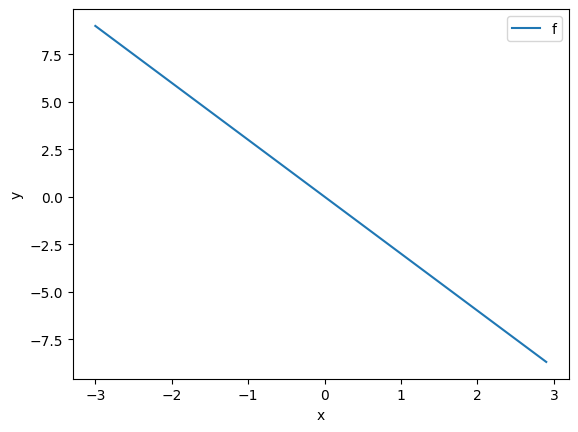

In [30]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.

In [31]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

Plot the <code>Y</code>: 

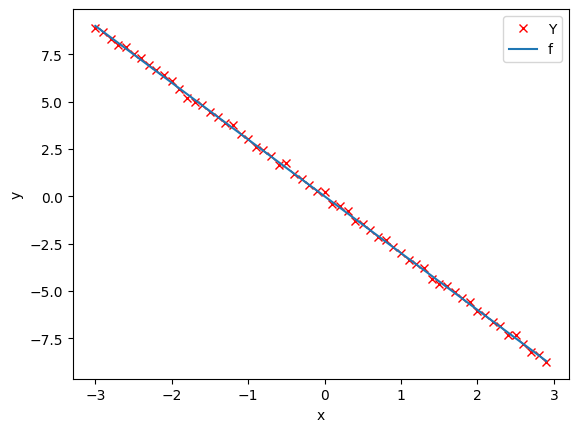

In [32]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>

In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.

First, define the <code>forward</code> function $y=w*x$. (We will add the bias in the next lab.)

In [33]:
# Create forward function for prediction

def forward(x):
    return w * x

Define the cost or criterion function using MSE (Mean Square Error): 

In [34]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Define the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:   

In [35]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument <code>requires_grad</code> to <code> True</code> because the system must learn it.

In [36]:
w = torch.tensor(-10.0, requires_grad = True)

Create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:

In [37]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<!--Empty Space for separating topics-->

<h2 id="Train">Train the Model</h2>

Let us define a function for training the model. The steps will be described in the comments.

In [38]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

Let us try to run 4 iterations of gradient descent:  

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

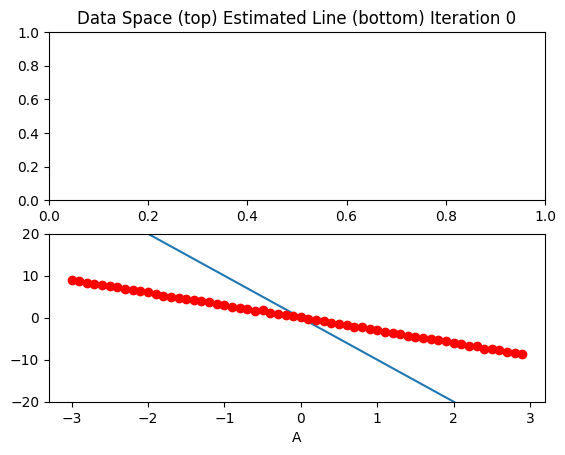

In [39]:
# Give 4 iterations for training the model here.

train_model(4)

Plot the cost for each iteration: 

Text(22.472222222222214, 0.5, 'Cost')

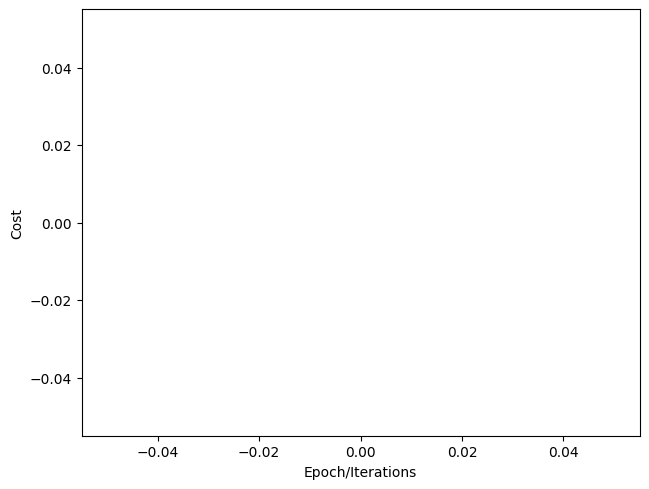

In [40]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<!--Empty Space for separating topics-->

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

Create a new learnable parameter <code>w</code> with an initial value of -15.0.

In [ ]:
# Practice: Create w with the inital value of -15.0

# Type your code here

<!--Empty Space for separating topics-->

<h3>Practice</h3>

Create an empty list <code>LOSS2</code>:

In [ ]:
# Practice: Create LOSS2 list

# Type your code here

<!--Empty Space for separating topics-->

<h3>Practice</h3>

Write your own <code>my_train_model</code> function with loss list <code>LOSS2</code>. And run it with 4 iterations.

In [ ]:
# Practice: Create your own my_train_model

gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

# your code here


<!--Empty Space for separating topics-->

<h3>Practice</h3>

Plot an overlay of the list <code>LOSS2</code> and <code>LOSS</code>. 

In [ ]:
# Practice: Plot the list LOSS2 and LOSS

# Type your code here

<!--Empty Space for separating topics-->

<h3>Practice</h3>

What does this tell you about the parameter value? 

#### type your answer here


<!--Empty Space for separating topics-->

<hr>

<h1>Problem 3: Linear regression 1D: Training Two Parameters</h1>

<h2>Table of Contents</h2>
<p>In this problem, you will train a model with PyTorch by using the data that we created. The model will have the slope and bias. And we will review how to make a prediction in several different ways by using PyTorch.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function (Total Loss) </a></li>
    <li><a href="#Train">Train the Model </a></li>
</ul>
<p>Estimated Time Needed: <strong>20 min</strong></ul>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:  

In [ ]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch. 

In [ ]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2>

Import PyTorch: 

In [ ]:
# Import PyTorch library

import torch

Start with generating values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate.

In [ ]:
# Create f(X) with a slope of 1 and a bias of -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

Now, add some noise to the data:

In [ ]:
# Add noise

Y = f + 0.1 * torch.randn(X.size())

Plot the line and <code>Y</code> with noise:

In [ ]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>

Define the <code>forward</code> function: 

In [ ]:
# Define the forward function

def forward(x):
    return w * x + b

Define the cost or criterion function (MSE): 

In [ ]:
# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [ ]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

<!--Empty Space for separating topics-->

<h2 id="Train">Train the Model</h2>

Create model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True because we must learn it using the data.

In [ ]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Set the learning rate to 0.1 and create an empty list <code>LOSS</code> for storing the loss for each iteration.

In [ ]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

Define <code>train_model</code> function for train the model.

In [ ]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 15 iterations of gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space 

In [ ]:
# Train the model with 15 iterations

train_model(15)

Plot total loss/cost surface with loss values for different parameters in red:

In [ ]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<!--Empty Space for separating topics-->

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

Experiment using s learning rates 0.2 and width the following parameters. Run 15 iterations.

In [ ]:
# Practice: train and plot the result with lr = 0.2 and the following parameters

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []

# your code here



<h3>Practice</h3>

Plot the <code>LOSS</code> and <code>LOSS2</code>

In [ ]:
# Practice: Plot the LOSS and LOSS2 in order to compare the Total Loss

# Type your code here


<!--Empty Space for separating topics-->

<hr>

<h1>Problem 4: Linear regression 1D: Training Two Parameter Stochastic Gradient Descent (SGD)</h1>

<h2>Table of Contents</h2>
<p>In this problem, you will practice training a model by using Stochastic Gradient descent.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#BGD">Train the Model:Batch Gradient Descent</a></li>
    <li><a href="#SGD">Train the Model:Stochastic gradient descent</a></li>
    <li><a href="#SGD_Loader">Train the Model:Stochastic gradient descent with Data Loader</a></li>
</ul>
<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:  

In [ ]:
# These are the libraries we are going to use in the lab.

import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch.

In [ ]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2>

Set random seed: 

In [ ]:
# Set random seed

torch.manual_seed(1)

Generate values from <i>-3</i> to <i>3</i> that create a line with a slope of <i>1</i> and a bias of <i>-1</i>. This is the line that you need to estimate. Add some noise to the data:

In [ ]:
# Setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

Plot the results:

In [ ]:
# Plot out the data dots and line

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>

Define the <code>forward</code> function:

In [ ]:
# Define the forward function

def forward(x):
    return w * x + b

Define the cost or criterion function (MSE): 

In [ ]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [ ]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

<!--Empty Space for separating topics-->

<h2 id="BGD">Train the Model: Batch Gradient Descent</h2>

Create model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True because the system must learn it.

In [ ]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Set the learning rate to  0.1 and create an empty list <code>LOSS</code> for storing the loss for each iteration.

In [ ]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

Define <code>train_model</code> function for train the model.

In [ ]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 10 epochs of batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 

In [ ]:
# Train the model with 10 iterations

train_model(10)

<!--Empty Space for separating topics-->

<h2 id="SGD">Train the Model: Stochastic Gradient Descent</h2>

Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [ ]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Define <code>train_model_SGD</code> function for training the model.

In [ ]:
# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 

In [ ]:
# Train the model with 10 iterations

train_model_SGD(10)

Compare the loss of both batch gradient descent as SGD.

In [ ]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->

<h2 id="SGD_Loader">SGD with Dataset DataLoader</h2>

Import the module for building a dataset class: 

In [ ]:
# Import the library for DataLoader

from torch.utils.data import Dataset, DataLoader

Create a dataset class:

In [ ]:
# Dataset Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

Create a dataset object and check the length of the dataset.

In [ ]:
# Create the dataset and check the length

dataset = Data()
print("The length of dataset: ", len(dataset))

Obtain the first training point:  

In [ ]:
# Print the first point

x, y = dataset[0]
print("(", x, ", ", y, ")")

Similarly, obtain the first three training points:  

In [ ]:
# Print the first 3 point

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [ ]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create a <code>DataLoader</code> object by using the constructor: 

In [ ]:
# Create DataLoader

trainloader = DataLoader(dataset = dataset, batch_size = 1)

Define <code>train_model_DataLoader</code> function for training the model.

In [ ]:
# The function for training the model

w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # Loop
    for epoch in range(epochs):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)
        
        # store the loss 
        LOSS_Loader.append(criterion(Yhat, Y).tolist())
        
        for x, y in trainloader:
            
            # make a prediction
            yhat = forward(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # Backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            
            # Updata parameters slope
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr* b.grad.data
            
            # Clear gradients 
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 

In [ ]:
# Run 10 iterations

train_model_DataLoader(10)

Compare the loss of both batch gradient decent as SGD. Note that SGD converges to a minimum faster, that is, it decreases faster. 

In [ ]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

For practice, try to use SGD with DataLoader to train model with 10 iterations. Store the total loss in <code>LOSS</code>. We are going to use it in the next question.

In [ ]:
# Practice: Use SGD with trainloader to train model and store the total loss in LOSS

LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

# your code here


<h3>Practice</h3>

Plot the total loss

In [ ]:
# Practice: Plot the total loss using LOSS

# Type your code here

<!--Empty Space for separating topics-->

<hr>

<h1>Problem 5: Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Descent </h1> 

<h2>Table of Contents</h2>
<p>In this problem, you will create a model the PyTorch way, this will help you as models get more complicated</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data </a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function the PyTorch way </a></li>
    <li><a href="#BGD">Train the Model: Batch Gradient Descent</a></li>
</ul>

<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:  

In [ ]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch. 

In [ ]:
# class for ploting  

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2>

Import libraries and set random seed.

In [ ]:
# Import libraries and set random seed

import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate. Add some noise to the data:

In [ ]:
# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create a dataset object: 

In [ ]:
# Create dataset object

dataset = Data()

Plot out the data and the line.

In [ ]:
# Plot the data

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<!--Empty Space for separating topics-->

<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>

Create a linear regression class 

In [ ]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

We will use PyTorch build-in functions to create a criterion function; this calculates the total loss or cost 

In [ ]:
# Build in cost function

criterion = nn.MSELoss()

Create a linear regression object and optimizer object, the optimizer object will use the linear regression object.

In [ ]:
# Create optimizer

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
list(model.parameters())

Remember to construct an optimizer you have to give it an iterable containing the parameters i.e. provide <code> model.parameters()</code> as an input to the object constructor 

<img src="2.4model_optmiz.png" width="100" alt="Model Optimizer" />

Similar to the model, the optimizer has a state dictionary:

In [ ]:
optimizer.state_dict()

Many of the keys correspond to more advanced optimizers.

Create a <code>Dataloader</code> object: 

In [ ]:
# Create Dataloader object

trainloader = DataLoader(dataset = dataset, batch_size = 1)

PyTorch randomly initialises your model parameters. If we use those parameters, the result will not be very insightful as convergence will be extremely fast. So we will initialise the parameters such that they will take longer to converge, i.e. look cool  

In [ ]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

Create a plotting object, not part of PyTorch, just used to help visualize 

In [ ]:
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

<!--Empty Space for separating topics-->

<h2 id="BGD">Train the Model via Batch Gradient Descent</h2>

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 

In [ ]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())          
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        get_surface.plot_ps()


train_model_BGD(10)

In [ ]:
model.state_dict()

Let's use the following diagram to help clarify the process. The model takes <code>x</code> to produce an estimate <code>yhat</code>, it will then be compared to the actual <code>y</code>  with the loss function.

<img src="2.4get_loss.png" width="400" alt="Old Model Cost diagram" />

When we call <code>backward()</code> on the loss function, it will handle the differentiation. Calling the method step on the optimizer object it will update the parameters as they were inputs when we constructed the optimizer object. The connection is shown in the following figure :


<img src = "2.4update_param.png" width="500" alt="Model Cost with optimizer" />

<!--Empty Space for separating topics-->

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

Try to train the model via BGD with <code>lr = 0.1</code>. Use <code>optimizer</code> and the following given variables.

In [ ]:
# Practice: Train the model via BGD using optimizer

model = linear_regression(1,1)
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

# your code here


<!--Empty Space for separating topics-->

<hr>

<h1>Problem 6: Linear regression: Training and Validation Data</h1> 

<h2>Table of Contents</h2>
<p>In this problem, you will learn to select the best learning rate by using validation data.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#LR_Loader_Cost">Create a Linear Regression Object, Data Loader and Criterion Function</a></li>
    <li><a href="#LR_Hyper">Different learning rates and Data Structures to Store results for Different Hyperparameters</a></li>
    <li><a href="#Model">Train different modules for different Hyperparameters</a></li>
    <li><a href="#Result">View Results</a></li>
</ul>

<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries and set the random seed.

In [ ]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2>

First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.

In [ ]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers. 

In [ ]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:

In [ ]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->

<h2 id="LR_Loader_Cost">Create a Linear Regression Object,  Data Loader, and Criterion Function</h2>

In [ ]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create the criterion function and a <code>DataLoader</code> object: 

In [ ]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<!--Empty Space for separating topics-->

<h2 id="LR_Hyper">Different learning rates and Data Structures to Store results for different Hyperparameters</h2>

Create a list with different learning rates and a tensor (can be a list) for the training and validating cost/total loss. Include the list MODELS, which stores the training model for every value of the learning rate. 

In [ ]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

<!--Empty Space for separating topics-->

<h2 id="Model">Train different models  for different Hyperparameters</h2>

Try different values of learning rates, perform stochastic gradient descent, and save the results on the training data and validation data. Finally, save each model in a list.

In [ ]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

<!--Empty Space for separating topics-->

<h2 id="Result">View the Results</h2>

Plot the training loss and validation loss for each learning rate:  

In [ ]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Produce a prediction by using the validation data for each model:  

In [ ]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->

<h1><font size='6' color='red'> TO DO </font></h1>
<h3>Practice</h3>

The object <code>good_model</code> is the best performing model. Use the train loader to get the data samples x and y. Produce an estimate for <code>yhat</code> and print it out for every sample in a for a loop. Compare it to the actual prediction <code>y</code>.

In [ ]:
# your code here


<!--Empty Space for separating topics-->

<hr>